In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
sns.set()

from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
pd.set_option('display.max_columns', None)


In [2]:
df_purchase=pd.read_excel('Purchase_Dataset.xlsx')

In [3]:
df_purchase.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity Price_1  Price_2  Price_3  Price_4  Price_5  Promotion_1  \
0                  0    1.59     1.87     2.01     2.09     2.66            0   
1                  0    1.51     1.89     1.99     2.09     2.66            0   
2                  0    1.51     1.89     1.99     2.09     2.66            0   
3                  0    1.52     1.89     1.98     2.09     2.66            0   
4                  0    1.52     1.89     1.99     2.09     2.66            0   

   Promotion_2  Promotion_3  Promotion_4  Promotion_5  Sex  Marital status  \
0            1            0            0            0    0               0   
1            0            0            0            0    0               0   
2            0            0            0            0    0               0   
3            0            0            0            0    0               0   
4            0            0            0            0    0               0   

    Age  Education    Income  Occupation  Settlement size  
0  47.0          1  110866.0           1                0  
1  47.0          1  110866.0           1                0  
2  47.0          1  110866.0           1                0  
3  47.0          1       NaN           1                0  
4  47.0          1  110866.0           1                0

In [4]:
# How many rowas and columns
print('Rows:',df_purchase.shape[0])
print('Columns:',df_purchase.shape[1])

Rows: 59113
Columns: 24


In [5]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59113 entries, 0 to 59112
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 59113 non-null  int64  
 1   Day                59113 non-null  int64  
 2   Incidence          59113 non-null  int64  
 3   Brand              59113 non-null  int64  
 4   Quantity           59113 non-null  int64  
 5   Last_Inc_Brand     59113 non-null  int64  
 6   Last_Inc_Quantity  59113 non-null  int64  
 7   Price_1            58955 non-null  object 
 8   Price_2            58936 non-null  float64
 9   Price_3            58913 non-null  float64
 10  Price_4            58928 non-null  float64
 11  Price_5            58974 non-null  float64
 12  Promotion_1        59113 non-null  int64  
 13  Promotion_2        59113 non-null  int64  
 14  Promotion_3        59113 non-null  int64  
 15  Promotion_4        59113 non-null  int64  
 16  Promotion_5        591

In [6]:
df_purchase.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

### Lets find missing value

In [7]:
df_purchase.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity Price_1  Price_2  Price_3  Price_4  Price_5  Promotion_1  \
0                  0    1.59     1.87     2.01     2.09     2.66            0   
1                  0    1.51     1.89     1.99     2.09     2.66            0   
2                  0    1.51     1.89     1.99     2.09     2.66            0   
3                  0    1.52     1.89     1.98     2.09     2.66            0   
4                  0    1.52     1.89     1.99     2.09     2.66            0   

   Promotion_2  Promotion_3  Promotion_4  Promotion_5  Sex  Marital status  \
0            1            0            0            0    0               0   
1            0            0            0            0    0               0   
2            0            0            0            0    0               0   
3            0            0            0            0    0               0   
4            0            0            0            0    0               0   

    Age  Education    Income  Occupation  Settlement size  
0  47.0          1  110866.0           1                0  
1  47.0          1  110866.0           1                0  
2  47.0          1  110866.0           1                0  
3  47.0          1       NaN           1                0  
4  47.0          1  110866.0           1                0

In [8]:
df_purchase.isnull().sum()

ID                     0
Day                    0
Incidence              0
Brand                  0
Quantity               0
Last_Inc_Brand         0
Last_Inc_Quantity      0
Price_1              158
Price_2              177
Price_3              200
Price_4              185
Price_5              139
Promotion_1            0
Promotion_2            0
Promotion_3            0
Promotion_4            0
Promotion_5            0
Sex                    0
Marital status         0
Age                  190
Education              0
Income               309
Occupation             0
Settlement size        0
dtype: int64

### Inference
* **Price_1 column has 158 missing values.**
* **Price_2 column has 177 missing values.**
* **Price_3 column has 200 missing values.**
* **Price_4 column has 185 missing values.**
* **Price_5 column has 139 missing values.**
* **Age column has 190 missing values.**
* **Income column has 309 missing values.**

In [9]:
df_purchase[df_purchase.isnull().any(axis=1)]

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
3      200000001   16          0      0         0               0   
17     200000001   92          0      0         0               0   
20     200000001  111          0      0         0               1   
25     200000001  145          0      0         0               0   
38     200000001  237          0      0         0               0   
53     200000001  327          1      4         3               0   
61     200000001  381          0      0         0               0   
75     200000001  494          0      0         0               0   
90     200000001  637          0      0         0               0   
111    200000002   63          0      0         0               0   
129    200000002  218          0      0         0               0   
141    200000002  296          0      0         0               0   
157    200000002  440          0      0         0               0   
175    200000002  621          1      4         3               4   
185    200000002  697          0      0         0               0   
187    200000002  709          0      0         0               0   
194    200000003   17          1      2         3               0   
210    200000003  144          0      0         0               0   
211    200000003  151          0      0         0               0   
217    200000003  195          1      5         1               0   
232    200000003  276          0      0         0               0   
256    200000003  463          0      0         0               0   
282    200000003  679          0      0         0               0   
284    200000003  690          1      2         3               0   
285    200000003  693          1      2         1               2   
302    200000004  106          0      0         0               0   
313    200000004  194          1      5         2               5   
317    200000004  214          1      5         1               0   
319    200000004  223          0      0         0               0   
333    200000004  370          0      0         0               0   
354    200000004  541          0      0         0               0   
446    200000005  451          0      0         0               0   
460    200000005  550          1      5         1               0   
485    200000005  713          0      0         0               0   
496    200000006   74          0      0         0               0   
510    200000006  176          0      0         0               0   
512    200000006  184          1      5         2               0   
529    200000006  311          0      0         0               0   
540    200000006  425          0      0         0               0   
545    200000006  453          0      0         0               0   
576    200000006  727          0      0         0               0   
586    200000007   55          0      0         0               0   
601    200000007  188          0      0         0               0   
625    200000007  406          0      0         0               0   
659    200000007  707          0      0         0               0   
683    200000008  185          0      0         0               0   
700    200000008  324          0      0         0               0   
721    200000008  472          0      0         0               0   
743    200000008  636          0      0         0               0   
763    200000009   36          0      0         0               0   
787    200000009  181          0      0         0               0   
800    200000009  295          0      0         0               0   
806    200000009  342          0      0         0               0   
808    200000009  354          0      0         0               0   
809    200000009  357          1      2         1               0   
823    200000009  455          0      0         0               0   
826    200000009  476          0      0         0               0   
836    20000

In [10]:
import pandas as pd

def fill_missing_values_by_id(df):
    # Fill missing Age with mode for each group (ID)
    df['Age'] = df.groupby('ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0] \
                                                                     if not x.mode().empty else None))

    return df

# Example usage
data = fill_missing_values_by_id(df_purchase)


### Inference

* **We treated 190 missing values for Age column. We replaced missing 'Age' values within each group with the mode of the available 'Age' values in that group of 'ID' column.**

In [11]:
import pandas as pd

def fill_missing_income_by_id(df):
    # Group by ID and fill missing Income with mode for each group
    df['Income'] = df.groupby('ID')['Income'].transform(lambda x: x.fillna(x.mode().iloc[0] \
                                                                           if not x.mode().empty else None))
    
    return df

# Example usage
data = fill_missing_income_by_id(df_purchase)


### Inference
* **We treated 309 missing values for Income column. We replaced missing 'Income' values within each group with the mode of the available 'Income' values in that group of 'ID' column.**

In [12]:
# Droping all NaN values within the DataFrame
df_purchase.dropna(inplace=True)

In [13]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Inference

* **We performed missing value treatement for all columns. Now our dataframe is ready for Analysis.**

In [14]:
# Deleting ID column
# del df_purchase['ID']

In [15]:
df_purchase.describe().T

count          mean           std           min  \
ID                 58694.0  2.000003e+08    144.315842  2.000000e+08   
Day                58694.0  3.494306e+02    212.045789  1.000000e+00   
Incidence          58694.0  2.493952e-01      0.432667  0.000000e+00   
Brand              58694.0  8.442941e-01      1.633073  0.000000e+00   
Quantity           58694.0  6.919617e-01      1.498724  0.000000e+00   
Last_Inc_Brand     58694.0  8.408526e-01      1.631666  0.000000e+00   
Last_Inc_Quantity  58694.0  2.480833e-01      0.431904  0.000000e+00   
Price_2            58694.0  1.781002e+00      0.170865  1.260000e+00   
Price_3            58694.0  2.006789e+00      0.046868  1.870000e+00   
Price_4            58694.0  2.159950e+00      0.089821  1.760000e+00   
Price_5            58694.0  2.654795e+00      0.098275  2.110000e+00   
Promotion_1        58694.0  3.438341e-01      0.474991  0.000000e+00   
Promotion_2        58694.0  3.156370e-01      0.464773  0.000000e+00   
Promotion_3        58694.0  4.279824e-02      0.202404  0.000000e+00   
Promotion_4        58694.0  1.178655e-01      0.322452  0.000000e+00   
Promotion_5        58694.0  3.586397e-02      0.185953  0.000000e+00   
Sex                58694.0  3.858827e-01      0.486807  0.000000e+00   
Marital status     58694.0  3.931066e-01      0.488444  0.000000e+00   
Age                58694.0  3.879408e+01     12.052403  1.800000e+01   
Education          58694.0  1.101578e+00      0.652493  0.000000e+00   
Income             58694.0  1.218412e+05  40643.123123  3.824700e+04   
Occupation         58694.0  7.742018e-01      0.663242  0.000000e+00   
Settlement size    58694.0  6.559274e-01      0.794175  0.000000e+00   

                            25%           50%           75%           max  
ID                 2.000001e+08  2.000003e+08  2.000004e+08  2.000005e+08  
Day                1.610000e+02  3.430000e+02  5.300000e+02  7.300000e+02  
Incidence          0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
Brand              0.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00  
Quantity           0.000000e+00  0.000000e+00  0.000000e+00  1.500000e+01  
Last_Inc_Brand     0.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00  
Last_Inc_Quantity  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
Price_2            1.580000e+00  1.880000e+00  1.890000e+00  1.900000e+00  
Price_3            1.970000e+00  2.010000e+00  2.060000e+00  2.140000e+00  
Price_4            2.120000e+00  2.170000e+00  2.240000e+00  2.260000e+00  
Price_5            2.630000e+00  2.670000e+00  2.700000e+00  2.800000e+00  
Promotion_1        0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Promotion_2        0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Promotion_3        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
Promotion_4        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
Promotion_5        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
Sex                0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Marital status     0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Age                3.000000e+01  3.600000e+01  4.600000e+01  7.500000e+01  
Education          1.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00  
Income             9.554100e+04  1.179710e+05  1.385250e+05  3.093640e+05  
Occupation         0.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00  
Settlement size    0.000000e+00  0.000000e+00  1.000000e+00  2.000000e+00

### Inference
* **We have Days in between 1 to 730**
* **We have total 5 Brands**
* **Incidence, Brand, Quantity, Last_Inc_Brand, Last_Inc_Quantity, Promotion_1, Promotion_2, Promotion_3, Promotion_4, Promotion_5, Sex, Marital status, Education, Occupation, Settlement size are Number Categories Columns**
* **Age of people purchasing is 18 to 75**

### Heatmap to show the correlation between the features

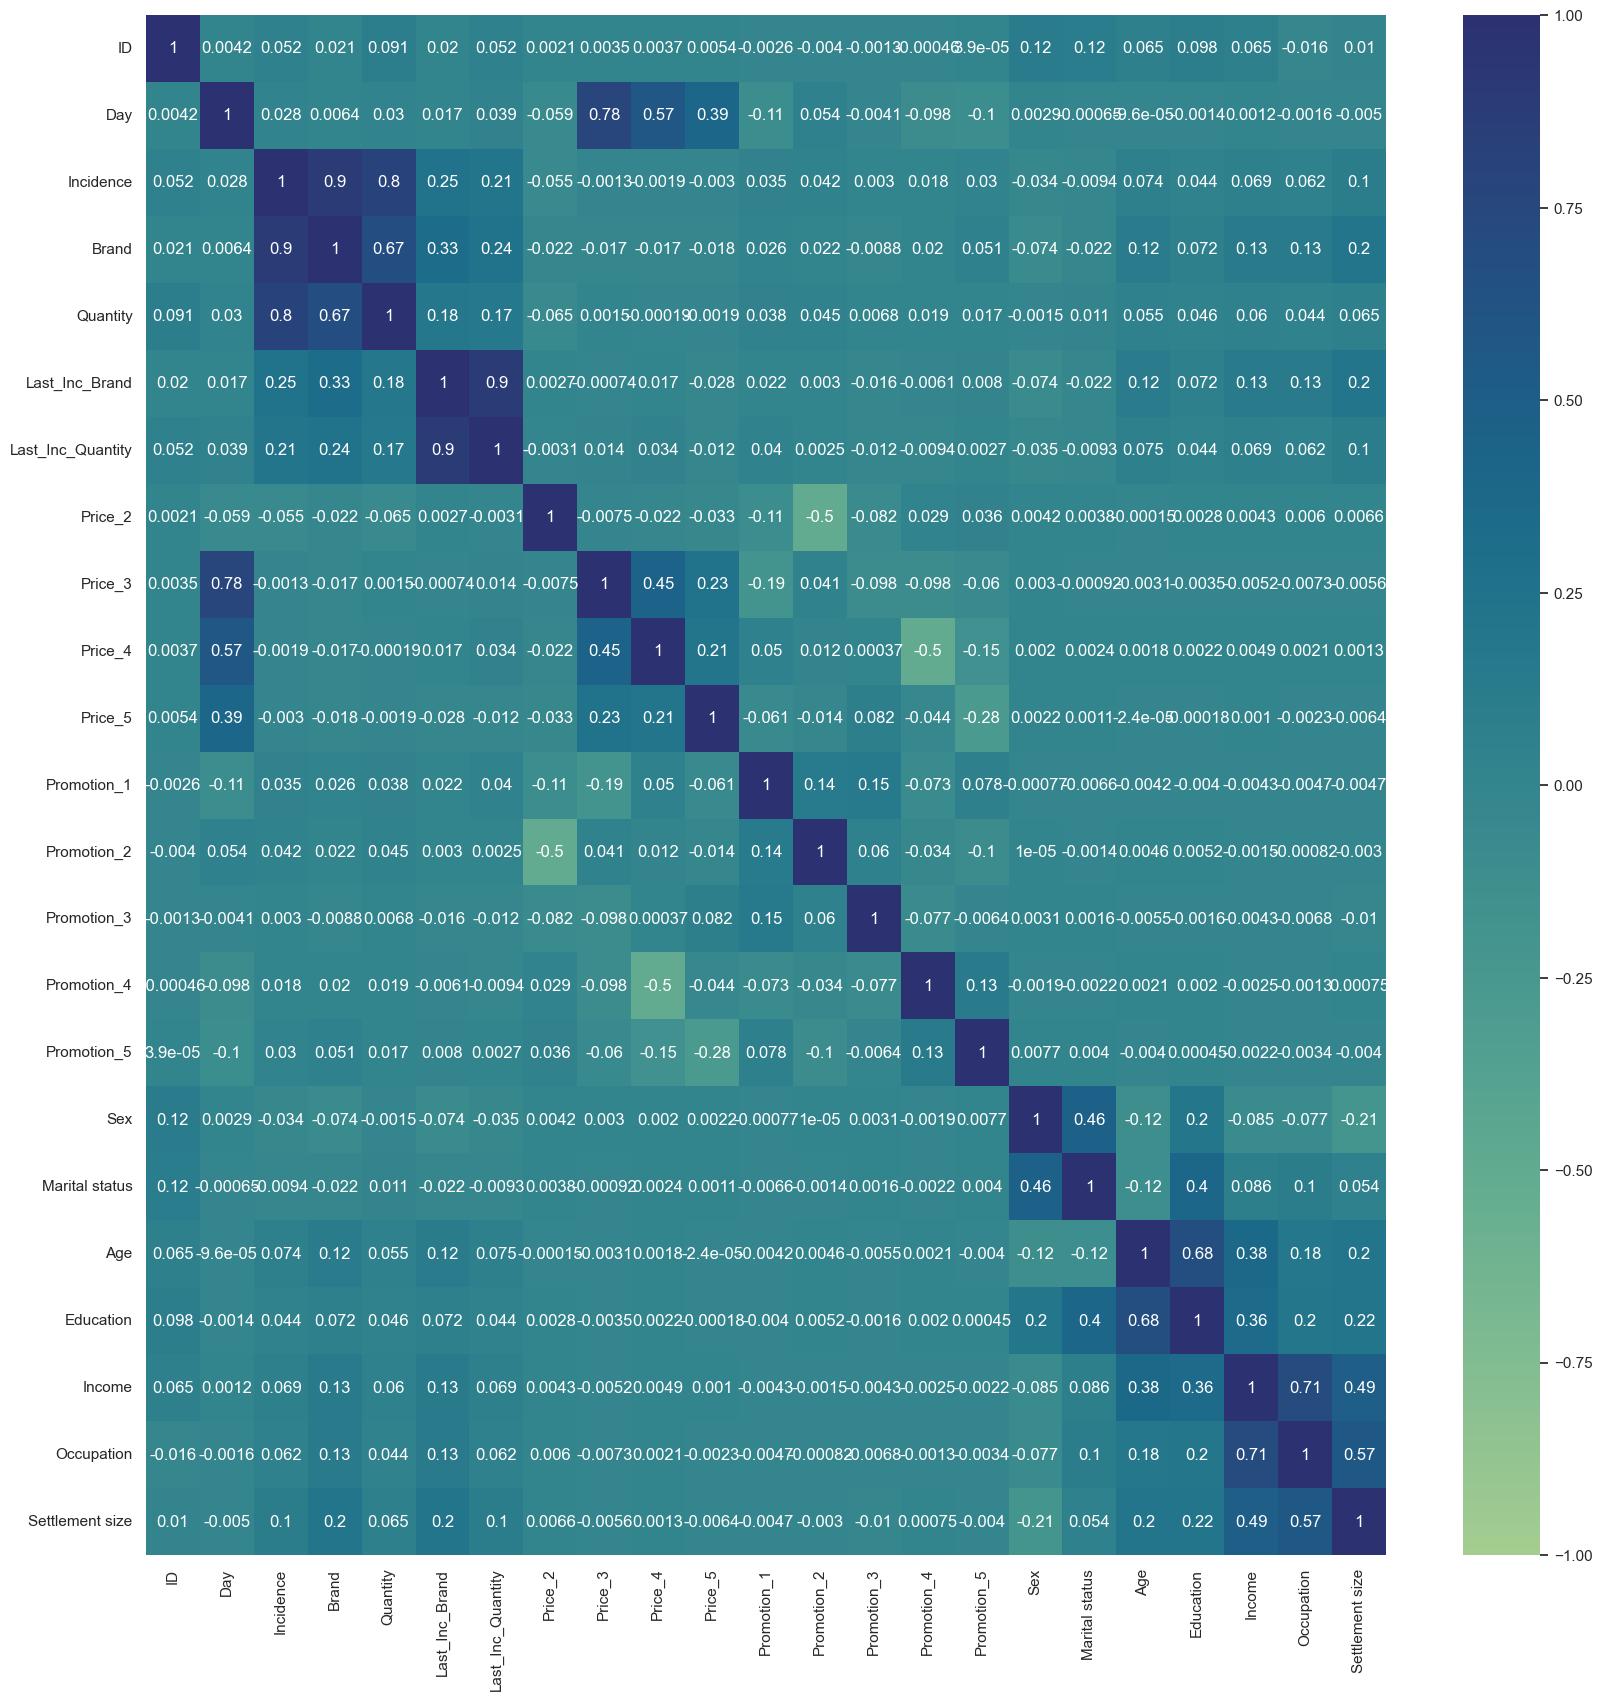

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df_purchase.corr(),annot=True,vmax=+1,vmin=-1,cmap="crest")
plt.show()

### Inference

Perfect Positive Correlation (1) <br>
Strong Positive Correlation (0.7 to 0.9) <br>
No Correlation (0) <br>
Strong Negative Correlation (-0.7 to -0.9) <br>
<br>
**Heatmap shows following correlations:**

**1. Day and Price_3 has strong positive correlation.**

**2. Incidence and Brand has strong positive correlation.**

**3. Incidence and Quality has strong positie correlation.**

**4. Brand and Quantity has strong positive correlation.**

**5. Last_Inc_Brand and Last_Inc_Quantity has strong positive correlation.**

**6. Age and Education has strong positive correlation.**

**7. Income and Occupation has strong positive correlation.**


###  Univariate Analysis

In [17]:
num_cols=['Day','Quantity','Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5','Age', 'Income']

In [18]:
cat_cols=['Incidence','Brand','Last_Inc_Brand','Last_Inc_Quantity','Promotion_1','Promotion_2','Promotion_3',\
          'Promotion_4','Promotion_5','Sex', 'Marital status','Education','Occupation','Settlement size']

### For Numerical Columns


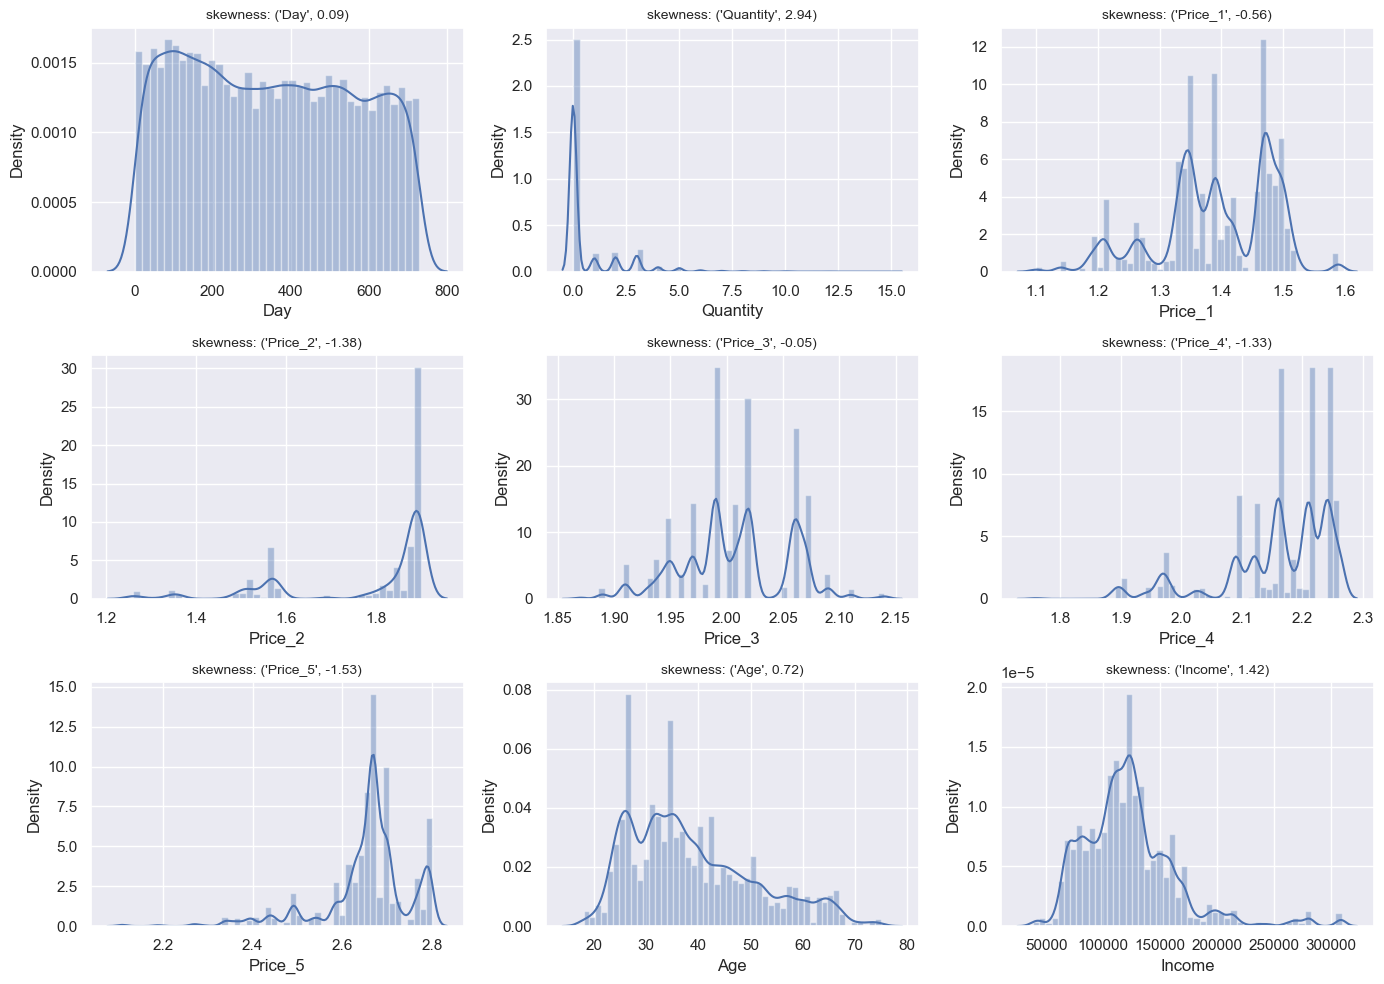

In [19]:
plt.figure(figsize=(14,10))
t = 1
for i in num_cols:
    plt.subplot(3,3,t)
    sns.distplot(df_purchase[i])
    plt.title(f'skewness: {i,round(data[i].skew(),2)}',fontsize=10)
    t+=1
plt.tight_layout()
plt.show()

### Inference

Perfectly Symmetric (Skewness = 0) <br>
Moderately Skewed (0.5 to 1 or -0.5 to -1) <br>
Highly Skewed (1 to 2 or -1 to -2) <br>
Very Highly Skewed (Greater than 2 or Less than -2) <br>

**1. Day column skweness value is 0.09 hence it is Prefectly Symmetric.** <br>
**2. Quality column skewness value is 2.94 hence it is Very Highly Right Skewed.** <br>
**3. Price_1 column skewness value is -0.56 hence it is Moderately Left Skewed.** <br>
**4. Price_2 column skewness value is -1.38 hence it is Highly Skewed.** <br>
**5. Price_3 column skewness value is -0.05 hence it is Perfectly Symmetric.** <br>
**6. Price_4 column skewness value is -1.33 hence it is Highly Skewed.** <br>
**7. Price_5 column skewness value is -1.53 hence it is Highly Skewed.** <br>
**8. Age column skewness value is 0.72 hence it is Moderately Skewed.** <br>
**9. Income column skewness value is 1.42 hence it is Highly Skewed.** <br>

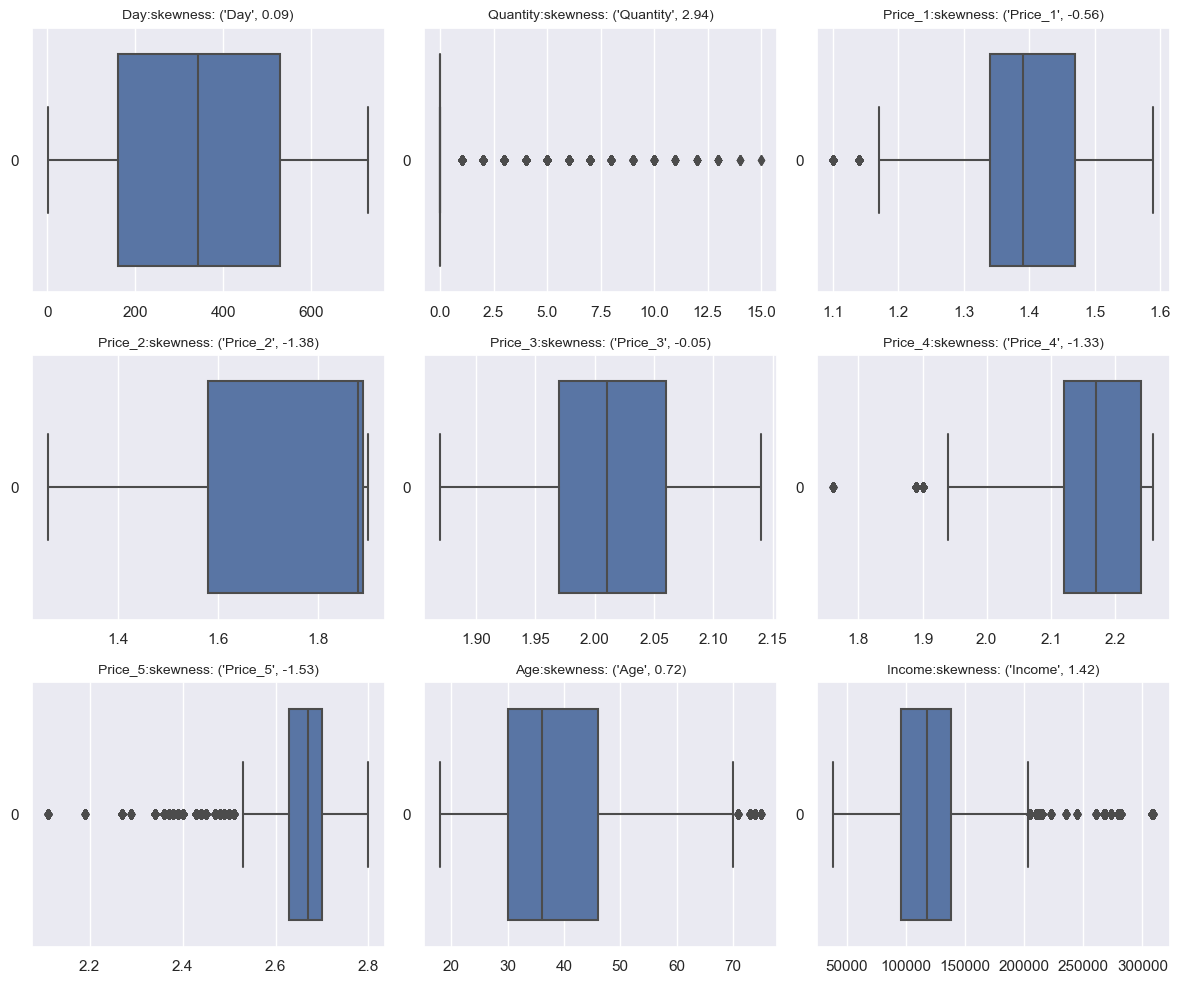

In [20]:
plt.figure(figsize=(12,10))
t = 1
for i in num_cols:
    plt.subplot(3,3,t)
    sns.boxplot(data[i],orient='h')
    plt.title(f'{i}:skewness: {i,round(df_purchase[i].skew(),2)}',fontsize=10)
    t+=1
plt.tight_layout()
plt.show()

### Inference

Perfectly Symmetric (Skewness = 0) <br>
Moderately Skewed (0.5 to 1 or -0.5 to -1) <br>
Highly Skewed (1 to 2 or -1 to -2) <br>
Very Highly Skewed (Greater than 2 or Less than -2) <br>

**1. Day column skweness value is 0.09 hence it is Prefectly Symmetric.** <br>
**2. Quality column skewness value is 2.94 hence it is Very Highly Right Skewed.** <br>
**3. Price_1 column skewness value is -0.56 hence it is Moderately Left Skewed.** <br>
**4. Price_2 column skewness value is -1.38 hence it is Highly Skewed.** <br>
**5. Price_3 column skewness value is -0.05 hence it is Perfectly Symmetric.** <br>
**6. Price_4 column skewness value is -1.33 hence it is Highly Skewed.** <br>
**7. Price_5 column skewness value is -1.53 hence it is Highly Skewed.** <br>
**8. Age column skewness value is 0.72 hence it is Moderately Skewed.** <br>
**9. Income column skewness value is 1.42 hence it is Highly Skewed.** <br>

### For Categorical Columns

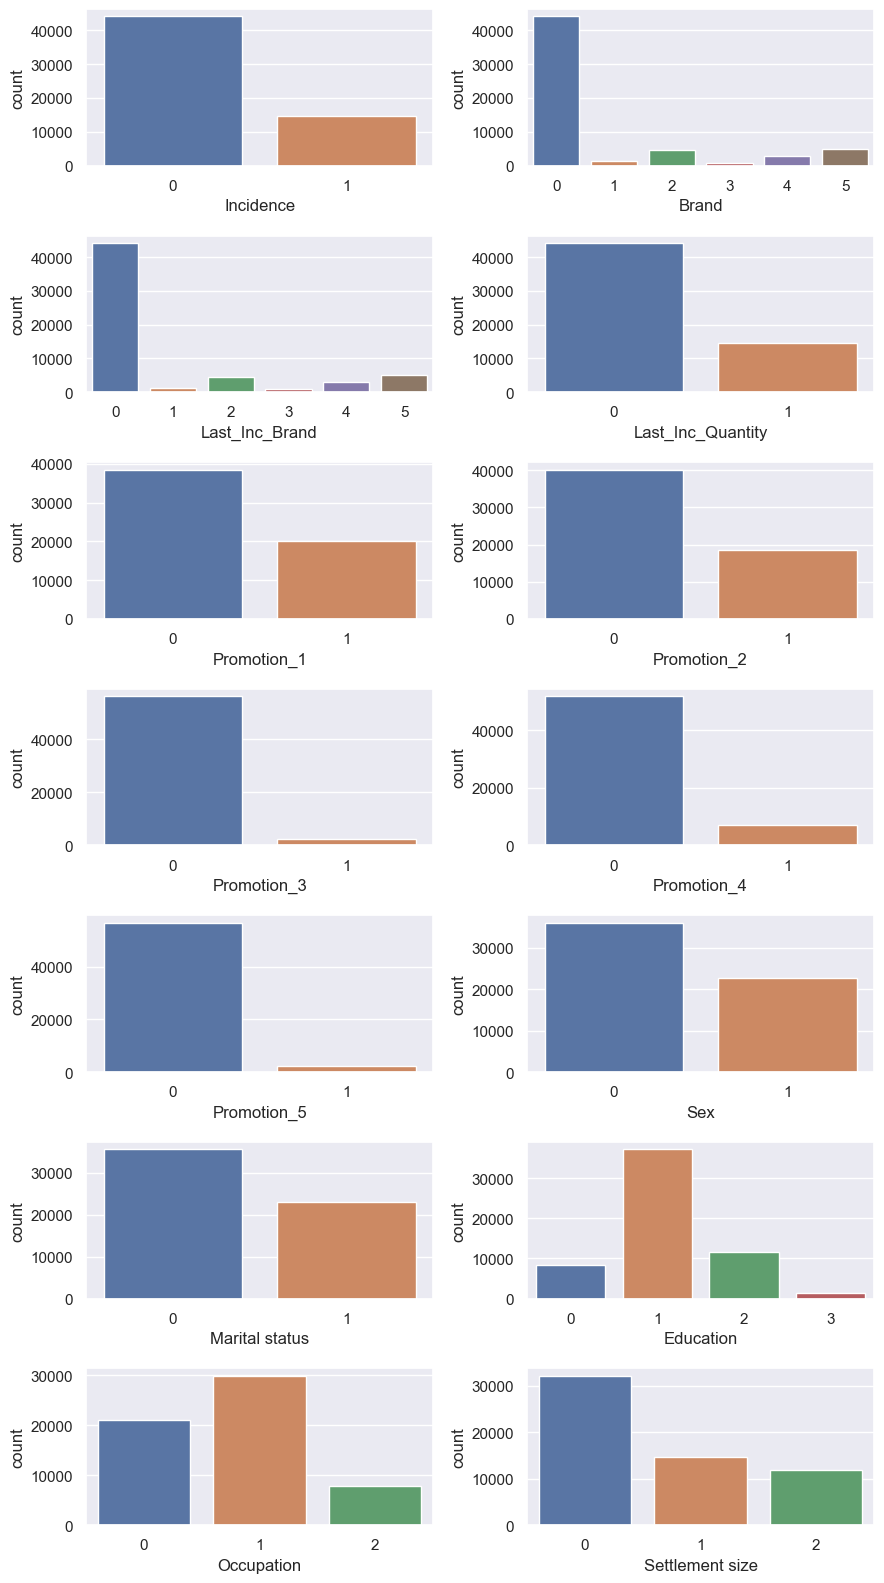

In [21]:
plt.figure(figsize=(9,16))
t=1
for i in cat_cols:
    plt.subplot(7,2,t)
    sns.countplot(x=df_purchase[i])
    t+=1
plt.tight_layout()
plt.show()   

### Inference

**1. Incidence column has two categories 0 and 1. And count of category 0 is highest.** <br>
**2. Brand column has six categories 0, 1, 2, 3, 4 and 5. And count of category 0 is highest.** <br>
**3. Last_Inc_Brand column has six categories 0, 1, 2, 3, 4 and 5. And count of category 0 is highest.** <br>
**4. Last_Inc_Quantity column has two categories 0 and 1. And count of category 0 is highest.** <br>
**5. Promotion_1 column has two categories 0 and 1. And count of category 0 is highest.** <br>
**6. Promotion_2 column has two categories 0 and 1. And count of category 0 is highest.** <br>
**7. Promotion_3 column has two categories 0 and 1. And count of category 0 is highest.** <br>
**8. Promotion_4 column has two categories 0 and 1. And count of category 0 is highest.** <br>
**9. Promotion_5 column has two categories 0 and 1. And count of category 0 is highest.** <br>
**10. Sex column has two categories 0 and 1. And count of category 0 is highest.** <br>
**11. Martial status column has two categories 0 and 1. And count of category 0 is highest.** <br>
**12. Education column has four categories 0, 1, 2 and 3. And count of category 1 is highest.** <br>
**13. Occupation column has three categories 0, 1 and 2. And count of category 1 is highest.** <br>
**14. Settlement size column has three categories 0, 1 and 2. And count of category 0 is highest.** <br>

## Data Segmentation

### Import Segmentation

In [22]:
scaler=pickle.load(open('scaler.pickle','rb'))

In [23]:
pca=pickle.load(open('pca.pickle','rb'))

In [24]:
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

### Standardization

In [25]:
df_purchase.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [26]:
features=data[['Sex','Marital status', 'Age', 'Education',\
                      'Income','Occupation', 'Settlement size']]
df_purchase_segm_std=scaler.transform(features)

### PCA

In [27]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

### K-means PCA

In [28]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [29]:
df_purchase_predictors=df_purchase.copy()

In [30]:
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

In [31]:
df_purchase_predictors.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity Price_1  Price_2  Price_3  Price_4  Price_5  Promotion_1  \
0                  0    1.59     1.87     2.01     2.09     2.66            0   
1                  0    1.51     1.89     1.99     2.09     2.66            0   
2                  0    1.51     1.89     1.99     2.09     2.66            0   
3                  0    1.52     1.89     1.98     2.09     2.66            0   
4                  0    1.52     1.89     1.99     2.09     2.66            0   

   Promotion_2  Promotion_3  Promotion_4  Promotion_5  Sex  Marital status  \
0            1            0            0            0    0               0   
1            0            0            0            0    0               0   
2            0            0            0            0    0               0   
3            0            0            0            0    0               0   
4            0            0            0            0    0               0   

    Age  Education    Income  Occupation  Settlement size  Segment  
0  47.0          1  110866.0           1                0        0  
1  47.0          1  110866.0           1                0        0  
2  47.0          1  110866.0           1                0        0  
3  47.0          1  110866.0           1                0        0  
4  47.0          1  110866.0           1                0        0

In [32]:
temp1=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1=temp1.set_index('ID')
temp1=temp1.rename(columns={'Incidence':'N_visits'})
temp1.head()

N_visits
ID                 
200000001       101
200000002        87
200000003        97
200000004        85
200000005       111

In [33]:
temp2=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2=temp2.set_index('ID')
temp2=temp2.rename(columns={'Incidence':'N_Purchases'})
temp3=temp1.join(temp2)
temp3.head()

N_visits  N_Purchases
ID                              
200000001       101            9
200000002        87           11
200000003        97           10
200000004        85           11
200000005       111           13

In [34]:
temp3['Averange_N_Purchase']=temp3['N_Purchases']/temp3['N_visits']
temp3.head()

N_visits  N_Purchases  Averange_N_Purchase
ID                                                   
200000001       101            9             0.089109
200000002        87           11             0.126437
200000003        97           10             0.103093
200000004        85           11             0.129412
200000005       111           13             0.117117

In [35]:
temp4=df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index=False).mean().astype(int)
temp4=temp4.set_index('ID')
df_purchase_descr=temp3.join(temp4)
df_purchase_descr.head()

N_visits  N_Purchases  Averange_N_Purchase  Segment
ID                                                            
200000001       101            9             0.089109        0
200000002        87           11             0.126437        3
200000003        97           10             0.103093        0
200000004        85           11             0.129412        1
200000005       111           13             0.117117        0

### Segment Proportions

In [36]:
segm_prop=df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop=segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop.head()

Segment Proportions
Segment                     
0                      0.290
1                      0.362
2                      0.152
3                      0.196

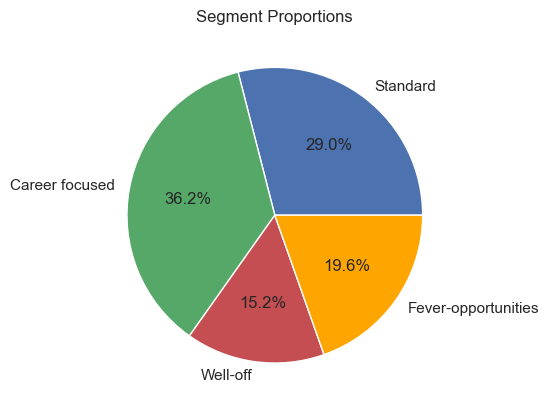

In [37]:
plt.pie(segm_prop['Segment Proportions'],labels=['Standard','Career focused','Well-off','Fever-opportunities'],\
       autopct='%1.1f%%',colors=('b','g','r','orange'))
plt.title('Segment Proportions')
plt.show()

### Purchase Occasion and Purchase Incidence

In [38]:
segments_mean=df_purchase_descr.groupby(['Segment']).mean()
segments_mean

N_visits  N_Purchases  Averange_N_Purchase
Segment                                              
0        120.496552    34.965517             0.258055
1        114.303867    22.823204             0.201760
2        118.828947    27.171053             0.228956
3        117.367347    34.408163             0.282601

In [39]:
segments_std=df_purchase_descr.groupby(['Segment']).std()

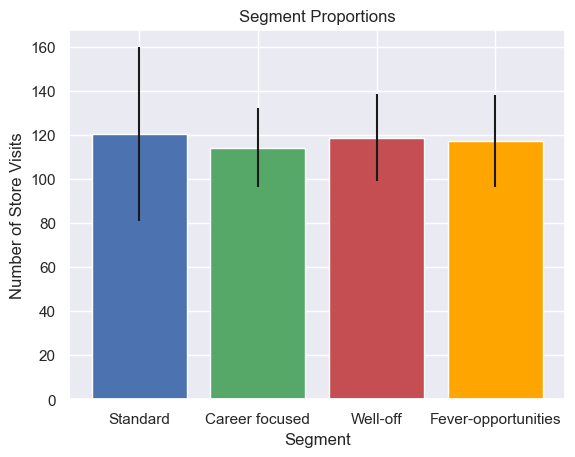

In [40]:
plt.bar(x=(0,1,2,3),tick_label=('Standard','Career focused','Well-off','Fever-opportunities'),\
       height=segments_mean['N_visits'],yerr=segments_std['N_visits'],color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Segment Proportions')
plt.show()

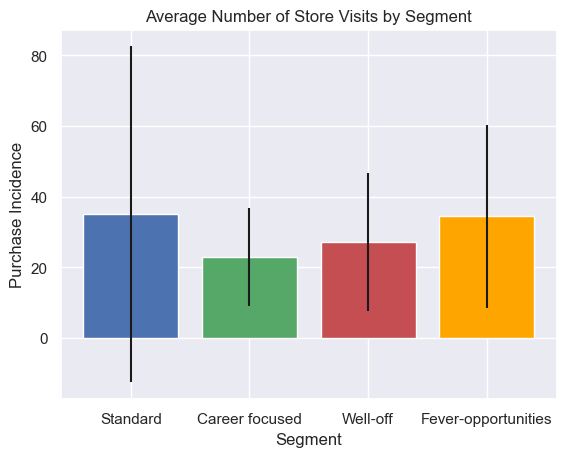

In [41]:
plt.bar(x=(0,1,2,3),tick_label=('Standard','Career focused','Well-off','Fever-opportunities'),\
       height=segments_mean['N_Purchases'],yerr=segments_std['N_Purchases'],color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidence')
plt.title('Average Number of Store Visits by Segment')
plt.show()

### Brand choice

In [42]:
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [43]:
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies['Segment'],brand_dummies['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']

In [44]:
brand_dummies

Brand_1  Brand_2  Brand_3  Brand_4  Brand_5  Segment         ID
6            0        1        0        0        0        0  200000001
11           0        0        0        0        1        0  200000001
19           1        0        0        0        0        0  200000001
24           0        0        0        1        0        0  200000001
30           0        1        0        0        0        0  200000001
53           0        0        0        1        0        0  200000001
80           0        1        0        0        0        0  200000001
81           0        1        0        0        0        0  200000001
98           0        0        0        0        1        0  200000001
102          0        0        0        1        0        3  200000002
116          0        0        0        1        0        3  200000002
139          0        0        0        1        0        3  200000002
142          0        0        0        1        0        3  200000002
154          0        0        0        1        0        3  200000002
160          0        0        0        1        0        3  200000002
161          0        0        0        1        0        3  200000002
162          0        0        0        1        0        3  200000002
164          0        1        0        0        0        3  200000002
165          0        0        0        1        0        3  200000002
167          0        0        0        1        0        3  200000002
191          0        1        0        0        0        0  200000003
213          0        0        0        0        1        0  200000003
216          0        0        0        0        1        0  200000003
229          0        1        0        0        0        0  200000003
283          0        1        0        0        0        0  200000003
285          0        1        0        0        0        0  200000003
286          0        1        0        0        0        0  200000003
287          0        1        0        0        0        0  200000003
288          0        1        0        0        0        0  200000003
289          0        1        0        0        0        0  200000003
297          0        0        0        0        1        1  200000004
309          0        0        0        0        1        1  200000004
310          0        0        0        0        1        1  200000004
312          0        0        0        0        1        1  200000004
313          0        0        0        0        1        1  200000004
316          0        0        0        0        1        1  200000004
339          0        0        0        0        1        1  200000004
341          0        1        0        0        0        1  200000004
342          0        0        0        0        1        1  200000004
363          0        0        0        0        1        1  200000004
376          0        0        0        0        1        1  200000004
383          0        0        0        0        1        0  200000005
384          0        0        0        0        1        0  200000005
401          0        0        0        0        1        0  200000005
403          0        0        0        0        1        0  200000005
417          0        0        0        0        1        0  200000005
426          0        0        0        0        1        0  200000005
431          0        0        0        0        1        0  200000005
437          0        0        0        0        1        0  200000005
453          0        0        0        0        1        0  200000005
456          0        0        0        0        1        0  200000005
458          0        0        0        0        1        0  200000005
460          0        0        0        0        1        0  200000005
473          0        0        0        0        1        0  200000005
497          0        0        0        0        1        0  200000006
505          0        0        

In [45]:
temp=brand_dummies.groupby(['ID'],as_index=True).mean()

In [46]:
mean_brand_choice=temp.groupby(['Segment'],as_index=True).mean()

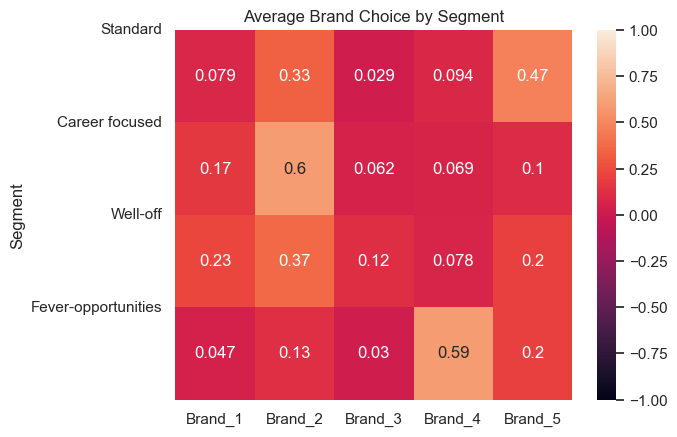

In [47]:
sns.heatmap(mean_brand_choice,annot=True,vmin=-1,vmax=1)
plt.yticks([0,1,2,3],['Standard','Career focused','Well-off','Fever-opportunities'],rotation=0)
plt.title('Average Brand Choice by Segment')
plt.show()

### Revenue

In [48]:
temp= df_purchase_predictors[df_purchase_predictors[ 'Brand'] == 1] 
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']] = temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

Segment  Revenue Brand 1
0        0           912.12
1        1          2807.51
2        2          1869.77
3        3           716.25

In [49]:
temp= df_purchase_predictors[df_purchase_predictors[ 'Brand'] == 2] 
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']] = temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()

In [50]:
temp= df_purchase_predictors[df_purchase_predictors[ 'Brand'] == 3] 
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()

In [51]:
temp= df_purchase_predictors[df_purchase_predictors[ 'Brand'] == 4] 
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()

In [52]:
temp= df_purchase_predictors[df_purchase_predictors[ 'Brand'] == 5] 
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()

In [53]:
segments_brand_revenue['Revenue Brand 1']

0     912.12
1    2807.51
2    1869.77
3     716.25
Name: Revenue Brand 1, dtype: float64

In [54]:
segments_brand_revenue['Total Revenue']=(segments_brand_revenue['Revenue Brand 1']+\
                                       segments_brand_revenue['Revenue Brand 2']+\
                                       segments_brand_revenue['Revenue Brand 3']+\
                                       segments_brand_revenue['Revenue Brand 4']+\
                                       segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

Segment  Revenue Brand 1  Revenue Brand 2  Revenue Brand 3  \
0        0           912.12          5222.99           603.79   
1        1          2807.51         11742.86          2388.88   
2        2          1869.77          3382.47          2303.31   
3        3           716.25          1419.99           725.54   

   Revenue Brand 4  Revenue Brand 5  Total Revenue  
0          2268.95         17838.58       26846.43  
1          1910.89          2638.52       21488.66  
2          1165.16          3638.75       12359.46  
3         13695.10          5505.01       22061.89

In [55]:
segments_brand_revenue['Segment Proportions']=segm_prop['Segment Proportions']
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map({0:'Standard',1:'Career-Focused',2:'Well-Off',3:'Fever-Opportunities'})
segments_brand_revenue=segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

Revenue Brand 1  Revenue Brand 2  Revenue Brand 3  \
Segment                                                                  
Standard                      912.12          5222.99           603.79   
Career-Focused               2807.51         11742.86          2388.88   
Well-Off                     1869.77          3382.47          2303.31   
Fever-Opportunities           716.25          1419.99           725.54   

                     Revenue Brand 4  Revenue Brand 5  Total Revenue  \
Segment                                                                
Standard                     2268.95         17838.58       26846.43   
Career-Focused               1910.89          2638.52       21488.66   
Well-Off                     1165.16          3638.75       12359.46   
Fever-Opportunities         13695.10          5505.01       22061.89   

                     Segment Proportions  
Segment                                   
Standard                           0.290  
Career-Focused                     0.362  
Well-Off                           0.152  
Fever-Opportunities                0.196